In [162]:
# importing required packages for analysis

import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# defining file paths for each file

fp_rec = 'School/IST-652_Scripting/final_project/recruiting.csv'
fp_sp = 'School/IST-652_Scripting/final_project/sp_2019.csv'
fp_tt = 'School/IST-652_Scripting/final_project/team_talent_2019.csv'

In [163]:
# reading in recruiting csv file

recruit = pd.read_csv(fp_rec)
recruit.head()

,team,conference,positionGroup,averageRating,totalRating,commits,averageStars,sp_rating
0,Air Force,Mountain West,Defensive Back,0.781641,17.1961,22,2.318182,12.1
1,Air Force,Mountain West,Receiver,0.779728,22.6121,29,2.241379,12.1
2,Air Force,Mountain West,Running Back,0.780267,9.3632,12,2.083333,12.1
3,Air Force,Mountain West,Special Teams,0.768064,8.4487,11,2.000000,12.1
4,Air Force,Mountain West,Offensive Line,0.767823,23.8025,31,2.064516,12.1


In [43]:
# reading in SP+ csv file

sp = pd.read_csv(fp_sp)
sp.head()

,team,conference,sp_rank,rating,offense.rating,defense.rating,specialTeams.rating
0,Ohio State,Big Ten,1,35.4,44.4,10.6,1.6
1,LSU,SEC,2,33.1,48.9,17.7,1.9
2,Alabama,SEC,3,32.4,47.7,14.6,-0.7
3,Clemson,ACC,4,28.1,43.5,14.6,-0.7
4,Georgia,SEC,5,26.8,34.2,10.0,2.6


In [44]:
# reading in Team Talent csv file

talent = pd.read_csv(fp_tt)

# calculating difference between Team Talent Rank and SP+ Rank to determing over- or under-achieving teams

talent['diff'] = talent['tt_rank'] - talent['sp_rank']
talent.head()

,school,tt_rank,talent,sp_rank,sp_rating,diff
0,Alabama,1,984.96,3,32.4,-2
1,Ohio State,2,973.56,1,35.4,1
2,Georgia,3,960.16,5,26.8,-2
3,USC,4,915.56,22,13.1,-18
4,LSU,5,906.17,2,33.1,3


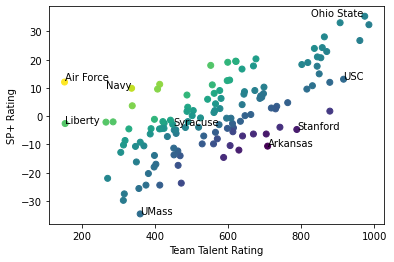

In [167]:
# creating plot of talent to SP+ rating

plt.scatter('talent', 'sp_rating', c = 'diff', data=talent)
plt.xlabel('Team Talent Rating')
plt.ylabel('SP+ Rating')
plt.text(970,35.4,'Ohio State',horizontalalignment='right')
plt.text(574.82,-3,'Syracuse',horizontalalignment='right')
plt.text(151.86,12.8,'Air Force')
plt.text(335,9.9,'Navy',horizontalalignment='right')
plt.text(789,-4.7,'Stanford')
plt.text(709,-10.6,'Arkansas')
plt.text(153,-2.6,'Liberty')
plt.text(358,-34.6,'UMass')
plt.text(915.56,13.1,'USC')
plt.show()

In [1]:
# calculating correlation between Team Talent and SP+ Rating

tt_mat = np.corrcoef(talent['talent'], talent['sp_rating'])
tt_corr = tt_mat[0,1]
tt_corr

NameError: name 'np' is not defined

In [46]:
# reporting on over-achievers

over = talent.sort_values(by = 'diff', ascending = False)
over.head()

,school,tt_rank,talent,sp_rank,sp_rating,diff
129,Air Force,130,151.86,25,12.1,105
118,Navy,119,335.40,31,9.9,88
100,Appalachian State,101,412.32,27,11.3,74
102,Louisiana,103,406.49,32,9.6,71
117,Ohio,118,337.17,49,3.7,69


In [47]:
# reporting on under-achievers

under = talent.sort_values(by = 'diff', ascending = True)
under.head()

,school,tt_rank,talent,sp_rank,sp_rating,diff
25,Arkansas,26,707.72,108,-10.6,-82
26,Maryland,27,703.94,96,-6.3,-69
19,Stanford,20,787.59,88,-4.7,-68
44,Georgia Tech,45,629.10,111,-12.0,-66
35,NC State,36,668.85,95,-6.3,-59


In [48]:
# creating new data frame for each position group

cols = ['team','positionGroup','averageRating','sp_rating','pg_color']

db_recruit = recruit.loc[recruit['positionGroup']=='Defensive Back',cols]
dl_recruit = recruit.loc[recruit['positionGroup']=='Defensive Line',cols]
lb_recruit = recruit.loc[recruit['positionGroup']=='Linebacker',cols]
ol_recruit = recruit.loc[recruit['positionGroup']=='Offensive Line',cols]
qb_recruit = recruit.loc[recruit['positionGroup']=='Quarterback',cols]
wr_recruit = recruit.loc[recruit['positionGroup']=='Receiver',cols]
rb_recruit = recruit.loc[recruit['positionGroup']=='Running Back',cols]
st_recruit = recruit.loc[recruit['positionGroup']=='Special Teams',cols]

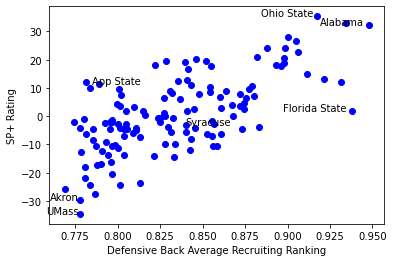

In [99]:
# creating scatter plot for each position, comparing average recruiting rating to SP+ rating

plt.scatter('averageRating', 'sp_rating', c = 'b', data=db_recruit)
plt.text(.945,32.4,'Alabama',horizontalalignment='right')
plt.text(.935,1.8,'Florida State',horizontalalignment='right')
plt.text(.915,35.4,'Ohio State',horizontalalignment='right')
plt.text(.785,11.3,'App State')
plt.text(.76,-29.8,'Akron')
plt.text(.758,-34.6,'UMass')
plt.text(.84,-3,'Syracuse')
plt.xlabel('Defensive Back Average Recruiting Ranking')
plt.ylabel('SP+ Rating')
plt.show()

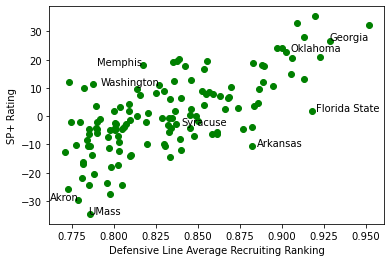

In [118]:
plt.scatter('averageRating', 'sp_rating', c = 'g', data=dl_recruit)
plt.text(.928,26.8,'Georgia')
plt.text(.779,-29.8,'Akron',horizontalalignment='right')
plt.text(.785,-34.6,'UMass')
plt.text(.885,-10.6,'Arkansas')
plt.text(.84,-3,'Syracuse')
plt.text(.92,1.8,'Florida State')
plt.text(.905,22.9,'Oklahoma')
plt.text(.827,11.1,'Washington',horizontalalignment='right')
plt.text(.817,18,'Memphis',horizontalalignment='right')
plt.xlabel('Defensive Line Average Recruiting Ranking')
plt.ylabel('SP+ Rating')
plt.show()

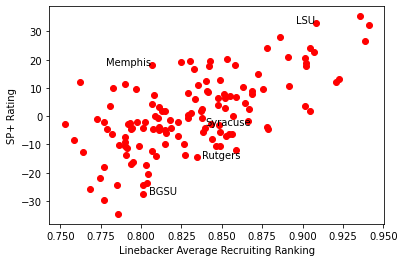

In [124]:
plt.scatter('averageRating', 'sp_rating', c = 'r', data=lb_recruit)
plt.text(.805,-27.5,'BGSU')
plt.text(.838,-15,'Rutgers')
plt.text(.84,-3,'Syracuse')
plt.text(.908,33.1,'LSU',horizontalalignment='right')
plt.text(.806,18,'Memphis',horizontalalignment='right')
plt.xlabel('Linebacker Average Recruiting Ranking')
plt.ylabel('SP+ Rating')
plt.show()

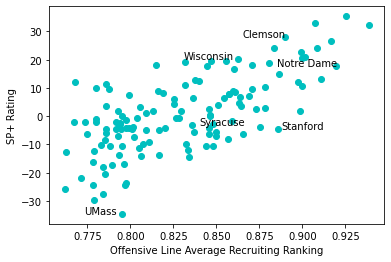

In [134]:
plt.scatter('averageRating', 'sp_rating', c = 'c', data=ol_recruit)
plt.text(.92,17.7,'Notre Dame',horizontalalignment='right')
plt.text(.84,-3,'Syracuse')
plt.text(.888,-4.7,'Stanford')
plt.text(.89,28.1,'Clemson',horizontalalignment='right')
plt.text(.86,20.3,'Wisconsin',horizontalalignment='right')
plt.text(.792,-34.6,'UMass',horizontalalignment='right')
plt.xlabel('Offensive Line Average Recruiting Ranking')
plt.ylabel('SP+ Rating')
plt.show()

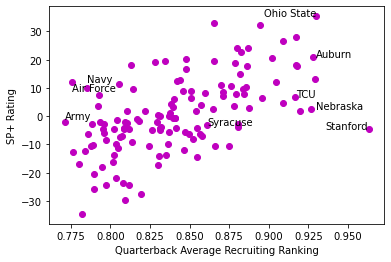

In [140]:
plt.scatter('averageRating', 'sp_rating', c = 'm', data=qb_recruit)
plt.text(.93,35.4,'Ohio State',horizontalalignment='right')
plt.text(.861,-3,'Syracuse')
plt.text(.917,6.7,'TCU')
plt.text(.963,-4.7,'Stanford',horizontalalignment='right')
plt.text(.93,21,'Auburn')
plt.text(.93,2.6,'Nebraska')
plt.text(.776,12.1,'Air Force')
plt.text(.785,9,'Navy')
plt.text(.771,-1,'Army')
plt.xlabel('Quarterback Average Recruiting Ranking')
plt.ylabel('SP+ Rating')
plt.show()

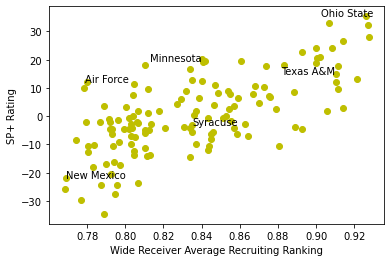

In [143]:
plt.scatter('averageRating', 'sp_rating', c = 'y', data=wr_recruit)
plt.text(.93,35.4,'Ohio State',horizontalalignment='right')
plt.text(.835,-3,'Syracuse')
plt.text(.769,-22,'New Mexico')
plt.text(.84,19.4,'Minnesota',horizontalalignment='right')
plt.text(.91,15,'Texas A&M',horizontalalignment='right')
plt.text(.779,12.1,'Air Force')
plt.xlabel('Wide Receiver Average Recruiting Ranking')
plt.ylabel('SP+ Rating')
plt.show()

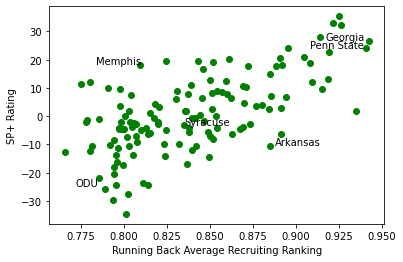

In [154]:
plt.scatter('averageRating', 'sp_rating', c = 'g', data=rb_recruit)
plt.text(.94,24.2,'Penn State',horizontalalignment='right')
plt.text(.835,-3,'Syracuse')
plt.text(.94,27,'Georgia',horizontalalignment='right')
plt.text(.81,18.4,'Memphis',horizontalalignment='right')
plt.text(.785,-24.8,'ODU',horizontalalignment='right')
plt.text(.888,-10.1,'Arkansas')
plt.xlabel('Running Back Average Recruiting Ranking')
plt.ylabel('SP+ Rating')
plt.show()

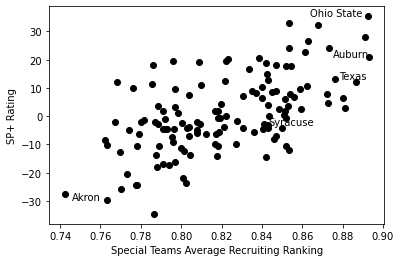

In [161]:
plt.scatter('averageRating', 'sp_rating', c = 'k', data=st_recruit)
plt.text(.89,35.4,'Ohio State',horizontalalignment='right')
plt.text(.843,-3,'Syracuse')
plt.text(.893,21,'Auburn',horizontalalignment='right')
plt.text(.892,13.2,'Texas',horizontalalignment='right')
plt.text(.76,-29.8,'Akron',horizontalalignment='right')
plt.xlabel('Special Teams Average Recruiting Ranking')
plt.ylabel('SP+ Rating')
plt.show()

In [172]:
# calculating correlation between recruiting rating and SP+ rating for each position group

db_mat = np.corrcoef(db_recruit['averageRating'], db_recruit['sp_rating'])
db_corr = db_mat[0,1]
db_corr

0.6807848552877692

In [173]:
dl_mat = np.corrcoef(dl_recruit['averageRating'], dl_recruit['sp_rating'])
dl_corr = dl_mat[0,1]
dl_corr

0.6882386802100712

In [174]:
lb_mat = np.corrcoef(lb_recruit['averageRating'], lb_recruit['sp_rating'])
lb_corr = lb_mat[0,1]
lb_corr

0.6523863699670791

In [175]:
ol_mat = np.corrcoef(ol_recruit['averageRating'], ol_recruit['sp_rating'])
ol_corr = ol_mat[0,1]
ol_corr

0.6824962995402621

In [176]:
qb_mat = np.corrcoef(qb_recruit['averageRating'], qb_recruit['sp_rating'])
qb_corr = qb_mat[0,1]
qb_corr

0.582039689506526

In [177]:
wr_mat = np.corrcoef(wr_recruit['averageRating'], wr_recruit['sp_rating'])
wr_corr = wr_mat[0,1]
wr_corr

0.6810264189883268

In [178]:
rb_mat = np.corrcoef(rb_recruit['averageRating'], rb_recruit['sp_rating'])
rb_corr = rb_mat[0,1]
rb_corr

0.643712275708261

In [179]:
st_mat = np.corrcoef(st_recruit['averageRating'], st_recruit['sp_rating'])
st_corr = st_mat[0,1]
st_corr

0.5952331273429278